<a href="https://colab.research.google.com/github/abidrozhan/FinalTerm-Machine-Learning/blob/main/AbidRozhan_Finalterm_Transaction_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# CELL 1 — Import Library

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)


In [4]:
# CELL 2 Load Dataset (Hemat RAM)

train_path = "/train_transaction.csv"

selected_cols = [
    "TransactionID",
    "isFraud",
    "TransactionDT",
    "TransactionAmt",
    "card1",
    "card2",
    "card3",
    "card4",
    "addr1",
    "addr2",
    "dist1",
    "C1",
    "C2",
    "D1",
    "D2"
]

dtypes_train = {
    "TransactionID": "int32",
    "isFraud": "int8",
    "TransactionDT": "int32",
    "TransactionAmt": "float32",
    "card1": "float32",
    "card2": "float32",
    "card3": "float32",
    "card4": "category",
    "addr1": "float32",
    "addr2": "float32",
    "dist1": "float32",
    "C1": "float32",
    "C2": "float32",
    "D1": "float32",
    "D2": "float32"
}

train = pd.read_csv(
    train_path,
    usecols=selected_cols,
    dtype=dtypes_train
)

train.head()


,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card4,addr1,addr2,dist1,C1,C2,D1,D2
0,2987000,0,86400,68.5,13926.0,NaN,150.0,discover,315.0,87.0,19.0,1.0,1.0,14.0,NaN
1,2987001,0,86401,29.0,2755.0,404.0,150.0,mastercard,325.0,87.0,NaN,1.0,1.0,0.0,NaN
2,2987002,0,86469,59.0,4663.0,490.0,150.0,visa,330.0,87.0,287.0,1.0,1.0,0.0,NaN
3,2987003,0,86499,50.0,18132.0,567.0,150.0,mastercard,476.0,87.0,NaN,2.0,5.0,112.0,112.0
4,2987004,0,86506,50.0,4497.0,514.0,150.0,mastercard,420.0,87.0,NaN,1.0,1.0,0.0,NaN


In [5]:
# CELL 3 — Sampling Data untuk mengurangi beban komputasi saat eksplorasi awal atau tuning model, dengan tetap menjaga proporsi kelas

use_sampling = True
sample_frac = 0.3  # misalnya gunakan 30% data untuk eksplorasi dan training awal

if use_sampling:
    train_sampled = train.sample(frac=sample_frac, random_state=42)
else:
    train_sampled = train

print("Ukuran data asli:", train.shape)
print("Ukuran data setelah sampling:", train_sampled.shape)

train_sampled["isFraud"].value_counts(normalize=True)


Ukuran data asli: (590540, 15)
Ukuran data setelah sampling: (177162, 15)


,proportion
isFraud,
0,0.964208
1,0.035792


In [6]:
# CELL 4 — Eksplorasi Data Awal

print("=== Head ===")
display(train_sampled.head())

print("\n=== Info ===")
train_sampled.info()

print("\n=== Descriptive Statistics (Numerik) ===")
display(train_sampled.describe())


=== Head ===


,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card4,addr1,addr2,dist1,C1,C2,D1,D2
470624,3457624,0,12153579,724.000000,7826.0,481.0,150.0,mastercard,387.0,87.0,NaN,3.0,1.0,0.0,NaN
565820,3552820,0,15005886,108.500000,12544.0,321.0,150.0,visa,476.0,87.0,0.0,2.0,1.0,122.0,122.0
284083,3271083,0,6970178,47.950001,9400.0,111.0,150.0,mastercard,315.0,87.0,6.0,1.0,1.0,32.0,32.0
239689,3226689,0,5673658,100.598999,15885.0,545.0,185.0,visa,NaN,NaN,NaN,2.0,3.0,0.0,NaN
281855,3268855,0,6886780,107.949997,15497.0,490.0,150.0,visa,299.0,87.0,NaN,10.0,14.0,549.0,549.0



=== Info ===
<class 'pandas.core.frame.DataFrame'>
Index: 177162 entries, 470624 to 108031
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   TransactionID   177162 non-null  int32   
 1   isFraud         177162 non-null  int8    
 2   TransactionDT   177162 non-null  int32   
 3   TransactionAmt  177162 non-null  float32 
 4   card1           177162 non-null  float32 
 5   card2           174540 non-null  float32 
 6   card3           176702 non-null  float32 
 7   card4           176699 non-null  category
 8   addr1           157575 non-null  float32 
 9   addr2           157575 non-null  float32 
 10  dist1           71544 non-null   float32 
 11  C1              177162 non-null  float32 
 12  C2              177162 non-null  float32 
 13  D1              176771 non-null  float32 
 14  D2              93223 non-null   float32 
dtypes: category(1), float32(11), int32(2), int8(1)
memory usage: 10.5 MB

=

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,addr1,addr2,dist1,C1,C2,D1,D2
count,1.771620e+05,177162.000000,1.771620e+05,177162.000000,177162.000000,174540.000000,176702.000000,157575.00000,157575.000000,71544.000000,177162.000000,177162.000000,176771.000000,93223.000000
mean,3.282277e+06,0.035792,7.371820e+06,135.345032,9897.962891,362.410858,153.192261,290.43512,86.805077,116.809212,14.336065,15.581518,94.854836,169.856415
std,1.702793e+05,0.185772,4.611526e+06,247.173462,4906.362305,157.807281,11.320047,101.58596,2.616271,369.553589,134.927017,156.566940,158.060242,177.554184
min,2.987000e+06,0.000000,8.640000e+04,0.251000,1006.000000,100.000000,100.000000,100.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.135047e+06,0.000000,3.032964e+06,43.212501,6019.000000,215.000000,150.000000,204.00000,87.000000,3.000000,1.000000,1.000000,0.000000,25.000000
50%,3.282265e+06,0.000000,7.306307e+06,68.949997,9678.000000,361.000000,150.000000,299.00000,87.000000,8.000000,1.000000,1.000000,3.000000,97.000000
75%,3.429273e+06,0.000000,1.123017e+07,125.000000,14207.500000,512.000000,150.000000,330.00000,87.000000,24.000000,3.000000,3.000000,123.000000,277.000000
max,3.577539e+06,1.000000,1.581113e+07,31937.390625,18396.000000,600.000000,231.000000,536.00000,102.000000,8081.000000,4668.000000,5624.000000,640.000000,640.000000


Jumlah kelas:
isFraud
0    170821
1      6341
Name: count, dtype: int64

Proporsi kelas:
isFraud
0    0.964208
1    0.035792
Name: proportion, dtype: float64


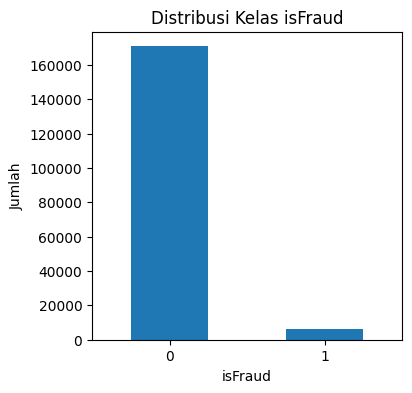

In [7]:
# CELL 5 — Analisis Target (isFraud)

target_counts = train_sampled["isFraud"].value_counts()
target_ratio = train_sampled["isFraud"].value_counts(normalize=True)

print("Jumlah kelas:")
print(target_counts)
print("\nProporsi kelas:")
print(target_ratio)

plt.figure(figsize=(4, 4))
target_counts.plot(kind="bar")
plt.title("Distribusi Kelas isFraud")
plt.xlabel("isFraud")
plt.ylabel("Jumlah")
plt.xticks(rotation=0)
plt.show()


In [8]:
# CELL 6 — Analisis Missing Value

missing_count = train_sampled.isnull().sum()
missing_ratio = missing_count / len(train_sampled)

missing_df = pd.DataFrame({
    "missing_count": missing_count,
    "missing_ratio": missing_ratio
}).sort_values("missing_ratio", ascending=False)

print("Missing value per kolom:")
display(missing_df)


Missing value per kolom:


,missing_count,missing_ratio
dist1,105618,0.596166
D2,83939,0.473798
addr2,19587,0.110560
addr1,19587,0.110560
card2,2622,0.014800
card4,463,0.002613
card3,460,0.002596
D1,391,0.002207
TransactionAmt,0,0.000000
isFraud,0,0.000000


In [9]:
# CELL 8 — Preprocessing Data (Imputasi)

train_preprocessed = train_sampled.copy()

numeric_cols = train_preprocessed.select_dtypes(include=["int16", "int32", "int64", "float16", "float32", "float64"]).columns.tolist()
numeric_cols = [c for c in numeric_cols if c != "isFraud"]

categorical_cols = train_preprocessed.select_dtypes(include=["object", "category"]).columns.tolist()

for col in numeric_cols:
    median_val = train_preprocessed[col].median()
    train_preprocessed[col] = train_preprocessed[col].fillna(median_val)

for col in categorical_cols:
    mode_val = train_preprocessed[col].mode(dropna=True)
    if not mode_val.empty:
        fill_val = mode_val[0]
    else:
        fill_val = "Unknown"
    train_preprocessed[col] = train_preprocessed[col].fillna(fill_val).astype("category")

train_preprocessed.isnull().sum()


,0
TransactionID,0
isFraud,0
TransactionDT,0
TransactionAmt,0
card1,0
card2,0
card3,0
card4,0
addr1,0
addr2,0


Label Encoding dipilih karena:

Lebih hemat memori dibanding One-Hot Encoding pada dataset besar dengan banyak kategori.
​

Cocok untuk model tree-based (Random Forest) dan masih dapat bekerja cukup baik untuk Logistic Regression dengan regularisasi dan scaling yang tepat.

In [10]:
# CELL 9 — Encoding Fitur Kategorikal (Label Encoding)

train_encoded = train_preprocessed.copy()

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    train_encoded[col] = le.fit_transform(train_encoded[col].astype(str))
    label_encoders[col] = le

train_encoded.head()


,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card4,addr1,addr2,dist1,C1,C2,D1,D2
470624,3457624,0,12153579,724.000000,7826.0,481.0,150.0,2,387.0,87.0,8.0,3.0,1.0,0.0,97.0
565820,3552820,0,15005886,108.500000,12544.0,321.0,150.0,3,476.0,87.0,0.0,2.0,1.0,122.0,122.0
284083,3271083,0,6970178,47.950001,9400.0,111.0,150.0,2,315.0,87.0,6.0,1.0,1.0,32.0,32.0
239689,3226689,0,5673658,100.598999,15885.0,545.0,185.0,3,299.0,87.0,8.0,2.0,3.0,0.0,97.0
281855,3268855,0,6886780,107.949997,15497.0,490.0,150.0,3,299.0,87.0,8.0,10.0,14.0,549.0,549.0


In [11]:
# CELL 10 — Feature Scaling

feature_cols = [c for c in train_encoded.columns if c not in ["isFraud", "TransactionID"]]

X = train_encoded[feature_cols]
y = train_encoded["isFraud"]

scaler = StandardScaler()

X_scaled = X.copy()
X_scaled[feature_cols] = scaler.fit_transform(X[feature_cols])

X_scaled.head()


,TransactionDT,TransactionAmt,card1,card2,card3,card4,addr1,addr2,dist1,C1,C2,D1,D2
470624,1.036917,2.381309,-0.422324,0.757399,-0.281480,-1.045805,0.997632,0.07029,-0.182451,-0.084038,-0.093173,-0.599156,-0.286451
565820,1.655436,-0.108597,0.539336,-0.264301,-0.281480,0.657609,1.926216,0.07029,-0.215669,-0.091451,-0.093173,0.173114,-0.099654
284083,-0.087096,-0.353542,-0.101499,-1.605282,-0.281480,-1.045805,0.246419,0.07029,-0.190755,-0.098865,-0.093173,-0.396593,-0.772122
239689,-0.368244,-0.140559,1.220326,1.166079,2.812691,0.657609,0.079482,0.07029,-0.182451,-0.091451,-0.080394,-0.599156,-0.286451
281855,-0.105180,-0.110822,1.141240,0.814870,-0.281480,0.657609,0.079482,0.07029,-0.182451,-0.032145,-0.010106,2.876060,3.090835


In [12]:
# CELL 11 — Train-Test Split

X_train, X_valid, y_train, y_valid = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Ukuran X_train:", X_train.shape)
print("Ukuran X_valid:", X_valid.shape)
print("Distribusi target train:")
print(y_train.value_counts(normalize=True))
print("\nDistribusi target valid:")
print(y_valid.value_counts(normalize=True))


Ukuran X_train: (141729, 13)
Ukuran X_valid: (35433, 13)
Distribusi target train:
isFraud
0    0.964206
1    0.035794
Name: proportion, dtype: float64

Distribusi target valid:
isFraud
0    0.964214
1    0.035786
Name: proportion, dtype: float64


Menggunakan class_weight='balanced' agar model memberi bobot lebih besar pada kelas minoritas tanpa melakukan oversampling seperti SMOTE.

In [13]:
# CELL 12 — Penanganan Class Imbalance

class_weight_setting = "balanced"  # akan dipakai di model
print("class_weight yang akan digunakan di model:", class_weight_setting)


class_weight yang akan digunakan di model: balanced


In [14]:
# CELL 13 — Model Baseline (Logistic Regression)

log_reg = LogisticRegression(
    penalty="l2",
    solver="lbfgs",
    max_iter=500,
    n_jobs=-1,
    class_weight=class_weight_setting
)

log_reg.fit(X_train, y_train)

y_valid_pred_proba_lr = log_reg.predict_proba(X_valid)[:, 1]
y_valid_pred_lr = (y_valid_pred_proba_lr >= 0.5).astype(int)


Confusion Matrix - Logistic Regression:
[[26981  7184]
 [  559   709]]

Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0     0.9797    0.7897    0.8745     34165
           1     0.0898    0.5591    0.1548      1268

    accuracy                         0.7815     35433
   macro avg     0.5348    0.6744    0.5147     35433
weighted avg     0.9479    0.7815    0.8488     35433

ROC-AUC - Logistic Regression: 0.735192730029302


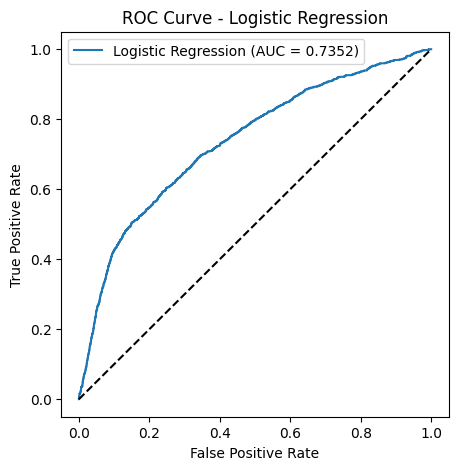

In [15]:
# CELL 14 — Evaluasi Model

cm_lr = confusion_matrix(y_valid, y_valid_pred_lr)
print("Confusion Matrix - Logistic Regression:")
print(cm_lr)

print("\nClassification Report - Logistic Regression:")
print(classification_report(y_valid, y_valid_pred_lr, digits=4))

roc_auc_lr = roc_auc_score(y_valid, y_valid_pred_proba_lr)
print("ROC-AUC - Logistic Regression:", roc_auc_lr)

fpr_lr, tpr_lr, _ = roc_curve(y_valid, y_valid_pred_proba_lr)

plt.figure(figsize=(5, 5))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {roc_auc_lr:.4f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()


In [16]:
# CELL 15 — Model Lanjutan (Random Forest Ringan)

rf_clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    n_jobs=-1,
    random_state=42,
    class_weight=class_weight_setting
)

rf_clf.fit(X_train, y_train)

y_valid_pred_proba_rf = rf_clf.predict_proba(X_valid)[:, 1]
y_valid_pred_rf = (y_valid_pred_proba_rf >= 0.5).astype(int)

roc_auc_rf = roc_auc_score(y_valid, y_valid_pred_proba_rf)
print("ROC-AUC - Random Forest:", roc_auc_rf)


ROC-AUC - Random Forest: 0.8576089846961835


Analisis Perbandingan Model
Dua model yang digunakan adalah Logistic Regression (baseline) dan Random Forest ringan dengan pembatasan n_estimators ≤ 100 dan max_depth ≤ 10 untuk menjaga efisiensi komputasi. Class imbalance ditangani dengan class_weight='balanced' pada kedua model sehingga evaluasi lebih adil terhadap kelas fraud yang jarang.

In [17]:
# CELL 16 — Perbandingan Model (Code)

from sklearn.metrics import precision_score, recall_score, f1_score

metrics = []

metrics.append({
    "Model": "Logistic Regression",
    "ROC_AUC": roc_auc_lr,
    "Precision": precision_score(y_valid, y_valid_pred_lr, zero_division=0),
    "Recall": recall_score(y_valid, y_valid_pred_lr, zero_division=0),
    "F1": f1_score(y_valid, y_valid_pred_lr, zero_division=0)
})

metrics.append({
    "Model": "Random Forest",
    "ROC_AUC": roc_auc_rf,
    "Precision": precision_score(y_valid, y_valid_pred_rf, zero_division=0),
    "Recall": recall_score(y_valid, y_valid_pred_rf, zero_division=0),
    "F1": f1_score(y_valid, y_valid_pred_rf, zero_division=0)
})

metrics_df = pd.DataFrame(metrics)
display(metrics_df)


,Model,ROC_AUC,Precision,Recall,F1
0,Logistic Regression,0.735193,0.089826,0.559148,0.154787
1,Random Forest,0.857609,0.180178,0.638013,0.281000


In [18]:
# CELL 17 — Training Model Terbaik

if roc_auc_rf >= roc_auc_lr:
    best_model_name = "Random Forest"
    best_model_class = RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        n_jobs=-1,
        random_state=42,
        class_weight=class_weight_setting
    )
else:
    best_model_name = "Logistic Regression"
    best_model_class = LogisticRegression(
        penalty="l2",
        solver="lbfgs",
        max_iter=500,
        n_jobs=-1,
        class_weight=class_weight_setting
    )

print("Model terbaik (berdasarkan ROC-AUC validasi):", best_model_name)

X_full = X_scaled
y_full = y

best_model = best_model_class
best_model.fit(X_full, y_full)


Model terbaik (berdasarkan ROC-AUC validasi): Random Forest


RandomForestClassifier(class_weight='balanced', max_depth=10, n_jobs=-1,
                       random_state=42)

In [20]:
# CELL 18 — Load Test Dataset (Hemat RAM)

test_path = "/test_transaction.csv"

test = pd.read_csv(
    test_path,
    usecols=[c for c in selected_cols if c != "isFraud"],
    dtype={k: v for k, v in dtypes_train.items() if k != "isFraud"}
)

print("Ukuran test:", test.shape)
test.head()


Ukuran test: (506691, 14)


,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card4,addr1,addr2,dist1,C1,C2,D1,D2
0,3663549,18403224,31.950001,10409.0,111.0,150.0,visa,170.0,87.0,1.0,6.0,6.0,419.0,419.0
1,3663550,18403263,49.000000,4272.0,111.0,150.0,visa,299.0,87.0,4.0,3.0,2.0,149.0,149.0
2,3663551,18403310,171.000000,4476.0,574.0,150.0,visa,472.0,87.0,2635.0,2.0,2.0,137.0,137.0
3,3663552,18403310,284.950012,10989.0,360.0,150.0,visa,205.0,87.0,17.0,5.0,2.0,42.0,42.0
4,3663553,18403317,67.949997,18018.0,452.0,150.0,mastercard,264.0,87.0,6.0,6.0,6.0,22.0,22.0


Preprocessing test harus konsisten dengan train:

Imputasi median/modus atau "Unknown"

LabelEncoding dengan encoder yang sudah dipelajari di train

Scaling dengan scaler yang sudah fit di train

In [22]:
# CELL 19 — Prediksi Data Test

test_preprocessed = test.copy()

# 1. Imputasi numerik: pakai median dari train
for col in numeric_cols:
    if col in test_preprocessed.columns:
        median_val = train_preprocessed[col].median()
        test_preprocessed[col] = test_preprocessed[col].fillna(median_val)

# 2. Imputasi + encoding kategorikal secara aman
test_categorical_cols = [c for c in categorical_cols if c in test_preprocessed.columns]

for col in test_categorical_cols:
    # pastikan dulu jadi object/string, hindari error categorical
    test_preprocessed[col] = test_preprocessed[col].astype("object")
    test_preprocessed[col] = test_preprocessed[col].fillna("Unknown")

    # ambil encoder yang sudah fit di train
    le = label_encoders[col]

    # semua kategori test yang tidak ada di train -> "Unknown"
    test_preprocessed[col] = test_preprocessed[col].apply(
        lambda x: x if x in le.classes_ else "Unknown"
    )

    # jika "Unknown" belum ada di kelas encoder, tambahkan dulu
    if "Unknown" not in le.classes_:
        le.classes_ = np.append(le.classes_, "Unknown")

    # transform ke label integer
    test_preprocessed[col] = le.transform(test_preprocessed[col])

# 3. Susun fitur dan scaling (konsisten dengan train)
X_test = test_preprocessed[feature_cols]

X_test_scaled = X_test.copy()
X_test_scaled[feature_cols] = scaler.transform(X_test[feature_cols])

# 4. Prediksi probabilitas fraud
test_proba = best_model.predict_proba(X_test_scaled)[:, 1]


In [23]:
# CELL 20 — Generate File Output

submission = pd.DataFrame({
    "TransactionID": test["TransactionID"].astype(int),
    "isFraud": test_proba
})

output_path = "submission_fraud_detection.csv"
submission.to_csv(output_path, index=False)

print("File submission disimpan sebagai:", output_path)
submission.head()


File submission disimpan sebagai: submission_fraud_detection.csv


,TransactionID,isFraud
0,3663549,0.097545
1,3663550,0.215040
2,3663551,0.291851
3,3663552,0.348784
4,3663553,0.234114


from matplotlib import pyplot as plt
_df_0['TransactionID'].plot(kind='hist', bins=20, title='TransactionID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['isFraud'].plot(kind='hist', bins=20, title='isFraud')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='TransactionID', y='isFraud', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['TransactionID']
  ys = series['isFraud']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('TransactionID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('TransactionID')
_ = plt.ylabel('isFraud')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['TransactionID']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'TransactionID'}, axis=1)
              .sort_values('TransactionID', ascending=True))
  xs = counted['TransactionID']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('TransactionID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('TransactionID')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['TransactionID'].plot(kind='line', figsize=(8, 4), title='TransactionID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['isFraud'].plot(kind='line', figsize=(8, 4), title='isFraud')
plt.gca().spines[['top', 'right']].set_visible(False)